In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import os, glob
import librosa
import librosa.display
import soundfile as sf
from scipy.signal import chirp, spectrogram, stft
from tftb.processing import WignerVilleDistribution
%matplotlib inline

In [2]:
obj_two_data = pd.read_excel('object2.xlsx', header = None)
obj_one_data = pd.read_excel('object1.xlsx', header = None)
obj_one_data.shape

(241, 16384)

In [3]:
obj_two_data.shape

(331, 16384)

In [5]:
array_obj_two = np.array(obj_two_data)
array_obj_two = np.delete(array_obj_two, 1, 0)
array_obj_two = np.delete(array_obj_two, 1, 0)
array_obj_one = np.array(obj_one_data)
array_obj_one = np.delete(array_obj_one, 1, 0)

array_obj_one = np.delete(array_obj_one, 1, 0)

In [6]:
array_obj_two = np.array(obj_two_data)
array_obj_two = np.delete(array_obj_two, 1, 0)
array_obj_two = np.delete(array_obj_two, 1, 0)
array_obj_one = np.array(obj_one_data)
array_obj_one = np.delete(array_obj_one, 1, 0)

array_obj_one = np.delete(array_obj_one, 1, 0)

In [7]:
# tfr = WignerVilleDistribution(array_obj_one[4])
# tfr.run()
# tfr.plot(kind='contour', show_tf=True)

In [127]:
def calculate_instantaneous_frequency(spectrum, f): 
        fre_spec_sum = 0.0
#       Applying loop on the length of the spectrum
        for i in range(0, len(spectrum)):
            fre_spec_sum = fre_spec_sum + np.sum(spectrum[i]) * f[i]
        return fre_spec_sum/np.sum(spectrum)
    
def calculate_TFA_GroupDelay(spectrum, t): 
        time_spec_sum = 0.0
#       Applying loop on the length of the spectrum
        for i in range(0, len(t)):
            j = i*2
            time_spec_sum = time_spec_sum + np.sum(spectrum[j]) * t[i]
        return time_spec_sum/np.sum(spectrum)

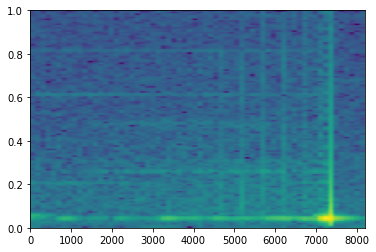

In [128]:
## Processing for object2
max_values_obj2 = []
sum_obj2 = []
instantaneous_power_values_obj2 = []
average_energy_obj2 = []
instantaneous_frequency_array_object2 = []
TFA_Group_Delay_Object2 = []

for i in range(array_obj_two.shape[0]):
    spectrum, freqs, t, im = plt.specgram(array_obj_two[i], NFFT=256, Fs=2, noverlap=0);
    max_value = np.amax(abs(spectrum[0]))
    instantaneous_power = (np.amax(abs(spectrum[0])))/t[np.argmax(abs(spectrum[0]))]
    sum_obj2.append(np.sum(spectrum))
    average_energy_obj2.append(np.sum(spectrum)/len(spectrum))
    max_values_obj2.append(max_value)
    instantaneous_power_values_obj2.append(instantaneous_power)
    instantaneous_frequency_array_object2.append(calculate_instantaneous_frequency(spectrum,freqs))
    TFA_Group_Delay_Object2.append(calculate_TFA_GroupDelay(spectrum, t))

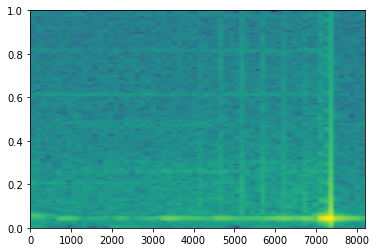

In [129]:
## Processing for object1
max_values_obj1 = []
sum_obj1 = []
instantaneous_power_values_obj1 = []
average_energy_obj1 = []
instantaneous_frequency_array_object1 = []
TFA_Group_Delay_Object1 = []

for i in range(array_obj_one.shape[0]):
    spectrum, freqs, t, im = plt.specgram(array_obj_one[i], NFFT=256, Fs=2, noverlap=0)
    instantaneous_power = (np.amax(abs(spectrum[0])))/t[np.argmax(abs(spectrum[0]))]
    max_value = np.amax(abs(spectrum[0]))
    sum_obj1.append(np.sum(spectrum))
    max_values_obj1.append(max_value)
    average_energy_obj1.append(np.sum(spectrum)/len(spectrum))
    instantaneous_power_values_obj1.append(instantaneous_power)
    instantaneous_frequency_array_object1.append(calculate_instantaneous_frequency(spectrum,freqs))
    TFA_Group_Delay_Object1.append(calculate_TFA_GroupDelay(spectrum, t))

In [130]:
## Merging and creating data frame
max_freq_dataframe_obj_one = pd.DataFrame(max_values_obj1, columns=["MaxFrequency"])
max_freq_dataframe_obj_two = pd.DataFrame(max_values_obj2, columns=["MaxFrequency"])
sum_obj1 = pd.DataFrame(sum_obj1, columns=["Spectrum Energy"])
sum_obj2 = pd.DataFrame(sum_obj2, columns=["Spectrum Energy"])
instantaneous_power_obj1 = pd.DataFrame(instantaneous_power_values_obj1, columns=["Instantaneous Power"])
instantaneous_power_obj2 = pd.DataFrame(instantaneous_power_values_obj2, columns=["Instantaneous Power"])
average_energy_obj1 = pd.DataFrame(average_energy_obj1, columns=["Average Energy"])
average_energy_obj2 = pd.DataFrame(average_energy_obj2, columns=["Average Energy"])
instantaneous_freq_obj1 = pd.DataFrame(instantaneous_frequency_array_object1, columns=["Instantaneous Frequency"])
instantaneous_freq_obj2 = pd.DataFrame(instantaneous_frequency_array_object2, columns=["Instantaneous Frequency"])
TFA_GroupDelay_obj1 = pd.DataFrame(TFA_Group_Delay_Object1, columns=["TFA Group Delay"])
TFA_GroupDelay_obj2 = pd.DataFrame(TFA_Group_Delay_Object2, columns=["TFA Group Delay"])

In [185]:
#sum_obj1["Target"] = 0
# sum_obj2["Target"] = 1
max_freq_dataframe_obj_one["Target"] = 0
max_freq_dataframe_obj_two["Target"] = 1

frames_freq = [max_freq_dataframe_obj_one, max_freq_dataframe_obj_two]
max_sum_frames = [sum_obj1, sum_obj2]
average_energy = [average_energy_obj1, average_energy_obj2]
instantaneous_power = [instantaneous_power_obj1, instantaneous_power_obj2]
instantaneous_freq = [instantaneous_freq_obj1, instantaneous_freq_obj2]
group_delay = [TFA_GroupDelay_obj1, TFA_GroupDelay_obj2]
final_freq_frame = pd.concat(frames_freq)
final_max_sum = pd.concat(max_sum_frames)
final_instantaneous_power = pd.concat(instantaneous_power)
final_average_energy = pd.concat(average_energy)
final_instantaneous_freq = pd.concat(instantaneous_freq)
final_group_delay = pd.concat(group_delay)
data_frames_list = [final_freq_frame, final_max_sum, final_instantaneous_power, final_average_energy, final_instantaneous_freq, final_group_delay]

In [186]:
# data_frame_freq_sum = pd.concat([final_freq_frame, final_max_sum], axis =1)
# data_frame_with_average_energy = pd.concat([data_frame_freq_sum, final_average_energy], axis =1)
# data_frame_with_instan_freq = pd.concat([data_frame_with_average_energy, final_instantaneous_freq], axis =1)
# data_frame_with_group_delay = pd.concat([data_frame_with_instan_freq, final_group_delay], axis =1)
final_data_frame = pd.concat(data_frames_list, axis =1)
final_data_frame.isnull().values.any()
final_data_frame

,MaxFrequency,Target,Spectrum Energy,Instantaneous Power,Average Energy,Instantaneous Frequency,TFA Group Delay
0,2.246051e+10,0,7.329066e+11,2.763350e+06,5.681446e+09,0.002625,42.500012
1,3.842053e+03,0,9.404116e+07,5.828358e-01,7.290013e+05,0.042834,186.389497
2,7.910337e+02,0,9.100440e+07,4.119967e+00,7.054604e+05,0.042971,186.825845
3,3.805260e+03,0,9.440205e+07,5.945719e+01,7.317989e+05,0.042503,184.747124
4,1.038515e+03,0,8.705725e+07,1.622680e+01,6.748624e+05,0.043077,187.748881
...,...,...,...,...,...,...,...
324,3.264063e+04,1,1.737546e+09,2.428618e+01,1.346935e+07,0.043026,194.621834
325,1.516015e+04,1,1.605577e+09,2.299780e+00,1.244634e+07,0.043140,192.252131
326,2.233882e+05,1,1.803108e+09,3.388777e+01,1.397758e+07,0.042592,195.178117
327,8.748207e+03,1,1.383324e+09,1.076305e+00,1.072344e+07,0.042356,184.946996


In [188]:
from sklearn.model_selection import train_test_split, cross_val_score

# Now splitting the data to test and training sets, its important never let our model to learn from test.
X = final_data_frame.drop("Target", axis =1)
y = final_data_frame["Target"]
np.random.seed(42)

# split in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) # 20 % data to be used for testing
X

,MaxFrequency,Spectrum Energy,Instantaneous Power,Average Energy,Instantaneous Frequency,TFA Group Delay
0,2.246051e+10,7.329066e+11,2.763350e+06,5.681446e+09,0.002625,42.500012
1,3.842053e+03,9.404116e+07,5.828358e-01,7.290013e+05,0.042834,186.389497
2,7.910337e+02,9.100440e+07,4.119967e+00,7.054604e+05,0.042971,186.825845
3,3.805260e+03,9.440205e+07,5.945719e+01,7.317989e+05,0.042503,184.747124
4,1.038515e+03,8.705725e+07,1.622680e+01,6.748624e+05,0.043077,187.748881
...,...,...,...,...,...,...
324,3.264063e+04,1.737546e+09,2.428618e+01,1.346935e+07,0.043026,194.621834
325,1.516015e+04,1.605577e+09,2.299780e+00,1.244634e+07,0.043140,192.252131
326,2.233882e+05,1.803108e+09,3.388777e+01,1.397758e+07,0.042592,195.178117
327,8.748207e+03,1.383324e+09,1.076305e+00,1.072344e+07,0.042356,184.946996


In [189]:
y

0      0
1      0
2      0
3      0
4      0
      ..
324    1
325    1
326    1
327    1
328    1
Name: Target, Length: 568, dtype: int64

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# put models in the dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Decission Tree": tree.DecisionTreeClassifier()}

# Create a function to fit and score models
# fits and evaluates the machine learning models
# X_train: training data(no labels)
# X_test: testing data(no labels)
# y_train: training labels
# y_test: testing labels
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    # set a random seed
    np.random.seed(42)
    #Male a dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        # fit the mdoel to the data
        model.fit(X_train, y_train)
        # evaluate the mdoel and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [191]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

{'Logistic Regression': 0.5352112676056338,
 'KNN': 0.852112676056338,
 'Random Forest': 0.9577464788732394,
 'Decission Tree': 0.8591549295774648}

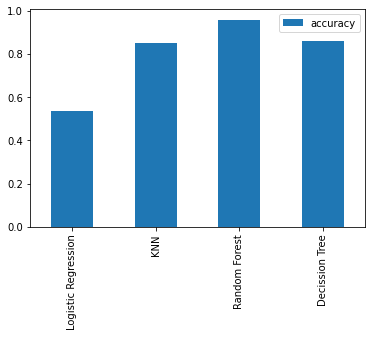

In [192]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [193]:
import pickle

# save the model to disk
filename = 'randomforest_model.sav'
pickle.dump(models["Random Forest"], open(filename, 'wb'))
 

In [194]:
read_file = pd.read_csv('/Users/brian/Desktop/Discrimination-of-reflected-sound-signals/Files_for_task_2_and_4/Object_2/frontyellow-0.8/data/002.csv', header = None, usecols=list(range(16384)))
read_file.to_excel(r'/Users/brian/Desktop/Discrimination-of-reflected-sound-signals/test_obj1.xlsx', index=None)
test_data = pd.read_excel('test_obj1.xlsx')
test_data.shape

(1, 16384)

In [195]:
read_file.shape

(1, 16384)

In [196]:
array_test = np.array(read_file)
array_test[0]

array([-12, -11,  -5, ...,  -7,  -7, -10])

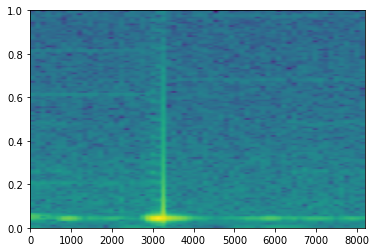

In [197]:
spectrum, freqs, t, im = plt.specgram(array_test[0], NFFT=256, Fs=2, noverlap=0)
test_max_sum = np.sum(spectrum)
test_instantaneous_power = (np.amax(abs(spectrum[0])))/t[np.argmax(abs(spectrum[0]))]
test_max_value = np.amax(abs(spectrum[0]))
average_energy = np.sum(spectrum)/len(spectrum)
instantaneous_frequency = calculate_instantaneous_frequency(spectrum,freqs)
tfa_Group_Delay = calculate_TFA_GroupDelay(spectrum, t)


max_freq_df = pd.DataFrame([test_max_freq], columns=["MaxFrequency"])
spectrum_energy_df = pd.DataFrame([test_max_sum], columns=["Spectrum Energy"])
instantaneous_power_df = pd.DataFrame([test_instantaneous_power], columns=["Instantaneous Power"])
average_energy_df = pd.DataFrame([average_energy], columns=["Average Energy"])
instantaneous_freq_df = pd.DataFrame([instantaneous_frequency], columns=["Instantaneous Frequency"])
TFA_GroupDelay_df = pd.DataFrame([tfa_Group_Delay], columns=["TFA Group Delay"])
frames = [max_freq_df, spectrum_energy_df, instantaneous_power_df, average_energy_df, instantaneous_freq_df,  TFA_GroupDelay_df]
final_data_frame = pd.concat(frames, axis=1)

In [198]:
final_data_frame

,MaxFrequency,Spectrum Energy,Instantaneous Power,Average Energy,Instantaneous Frequency,TFA Group Delay
0,1075.885886,5.163424e+08,0.329622,4.002654e+06,0.042184,180.081105


In [200]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(final_data_frame)
print(result[0])

1


## Extracting features TP, TN, FP, FN, FDR, NPV, TPR, TNR, F1, ROC

1. TP, TN, FP, FN - Confusion matrix
2. F1, ROC - Done
3. FDR, NPV, TPR, TNR

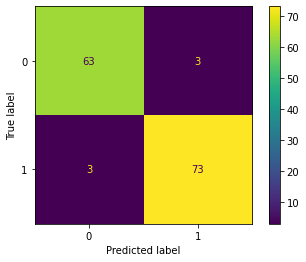

In [201]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_actual = y_test
y_est = models["Random Forest"].predict(X_test)
cm = confusion_matrix(y_actual, y_est).ravel()
tn, fp, fn, tp  = cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm.reshape(2,2))
disp.plot()

0.9605263157894737
0.9545454545454546
0.039473684210526314
0.9545454545454546


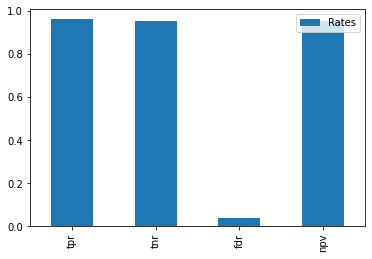

In [203]:
tpr = tp/(tp + fn)
tnr = tn/(tn + fp)
fdr = fp/(fp + tp)
npv = tn/(tn + fn)
print(tpr)
print(tnr)
print(fdr)
print(npv)
accuracy = (tp+tn)/(tp + tn + fp + fn)
precision = tp/(tp + fp)
values_all = {}
values_all["tpr"] = tp/(tp + fn)
values_all["tnr"] = tn/(tn + fp)
values_all["fdr"] = fp/(fp + tp)
values_all["npv"] = tn/(tn + fn)

values = pd.DataFrame(values_all, index=["Rates"])
values.T.plot.bar();

In [204]:
accuracy

0.9577464788732394

In [205]:
precision

0.9605263157894737

In [206]:
recall = tp/(tp + fn)
recall

0.9605263157894737

In [207]:
f1_score = 2 * (precision * recall)/(recall + precision)
f1_score

0.9605263157894737

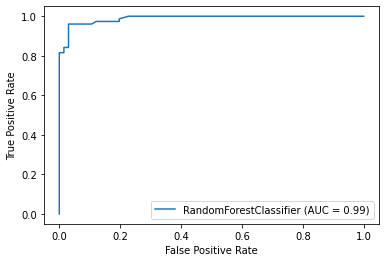

In [208]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

plot_roc_curve(models["Random Forest"], X_test, y_test);

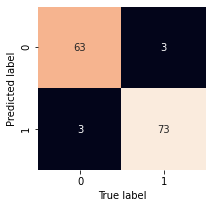

In [209]:
# Confusion matrix
import seaborn as sns # build on top pf matplotlib

y_preds = models["Random Forest"].predict(X_test)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

In [210]:
# Check best hyperparameters
random_forest = models["Random Forest"]

In [211]:
# Cross validated recall
cv_recall = cross_val_score(random_forest, X, y, cv=5, scoring="recall")

cv_recall_mean = np.mean(cv_recall)
cv_recall_mean

0.6148717948717949

In [212]:
# corss validated f1-score
cv_f1_score = cross_val_score(random_forest, X, y, cv=5, scoring="f1")

cv_rf_mean = np.mean(cv_f1_score)
cv_rf_mean

0.6685727169876823

In [213]:
from tftb.processing import WignerVilleDistribution

In [214]:
tfr = WignerVilleDistribution(array_obj_two[3])

In [215]:
tfr_wvd, t_wvd, f_wvd = tfr.run()

KeyboardInterrupt: 

In [ ]:
fre_array_np = np.array(tfr_wvd)
a = np.count_nonzero(fre_array_np)
a

In [ ]:
len(f_wvd)

In [ ]:
tfr.plot(kind='contour', show_tf=True)

In [ ]:
tfr = WignerVilleDistribution(array_obj_two[3])
tfr.run()
tfr.plot(kind='contour', show_tf=True)

In [ ]:
tfr = WignerVilleDistribution(array_obj_two[6])
tfr_wvd, t_wvd, f_wvd = tfr.run()
fre_array_np = np.array(tfr_wvd)
test_max_freq = np.amax(fre_array_np)
test_max_sum = np.sum(fre_array_np)/
print(test_max_freq)
print(test_max_sum)

In [ ]:
len(tfr_wvd)

In [ ]:
tfr = WignerVilleDistribution(array_obj_one[6])
tfr_wvd, t_wvd, f_wvd = tfr.run()
fre_array_np = np.array(tfr_wvd)
test_max_freq = np.amax(fre_array_np)
test_max_sum = np.sum(fre_array_np)
print(test_max_freq)
print(test_max_sum)

In [ ]:
from scipy.signal import hilbert

In [ ]:
spectrum, freqs, t, im = plt.specgram(array_obj_two[6], NFFT=256, Fs=2, noverlap=0)
test_max_freq = np.amax(abs(spectrum[0]))
test_max_sum = np.sum(spectrum)
print(test_max_freq)
print(test_max_sum)

In [ ]:
len(spectrum)